In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Path where csv file is located
data_path = "../csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,33.17822651
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [4]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [5]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [6]:
#CHecking shape
data_churn.shape

(7043, 22)

In [7]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21'],
      dtype='object')

In [8]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
Unnamed: 21         7043
dtype: int64

In [10]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

C:\Users\eek_e\AppData\Local\Temp\ipykernel_18364\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


In [12]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [14]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
Unnamed: 21         7032
dtype: int64

In [15]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [16]:
#describing the data
data_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
#renaming the data for  Hypothesis 5 Analyis - Partner/Dependents and Churn
data_churn = data_churn
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [18]:
#dropping the column not relevant to the study: InternetService,DeviceProtection, PaperlessBilling
data_churn5 = data_churn5.drop(columns=['InternetService', 'DeviceProtection','PaperlessBilling'])
data_churn5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784


In [19]:
#creating a data frame for the above data
df_data_churn5=pd.DataFrame(data_churn5)
df_data_churn5

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No,23.47287736
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No,71.34593023
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,11.70439189
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,4.120967742


In [20]:
#combining Partner and Dependents column into one and create a new column named "Family Plan"
df_data_churn5['Partner-Dependents'] = df_data_churn5.apply(lambda row: 'Yes' if row['Partner'] == 'Yes' or row['Dependents'] == 'Yes' else 'No', axis=1)
df_data_churn5

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Partner-Dependents
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,Yes
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No,33.17822651,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546,No
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No,23.47287736,Yes
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No,71.34593023,Yes
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,11.70439189,Yes
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,4.120967742,Yes


In [31]:
#counting the number of churn vs non churn customers by Family Plan
churn_counts = df_data_churn5.groupby('Partner-Dependents')['Churn'].value_counts()
churn_counts= churn_counts.reset_index()
churn_counts

,Partner-Dependents,Churn,count
0,No,No,2157
1,No,Yes,1123
2,Yes,No,3006
3,Yes,Yes,746


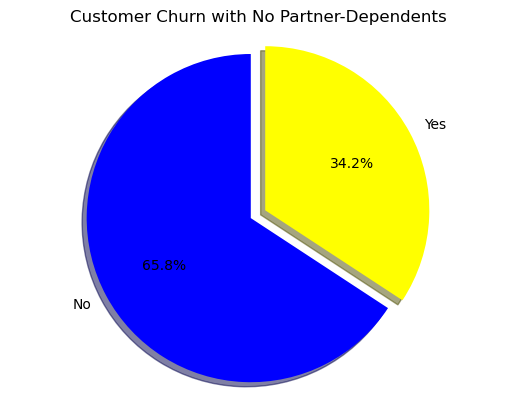

In [33]:
#creating the pie chart to show churn if Family Plan(FP) is no
#Filter data for Family Plan no
#yes - churn customers, no - non-churn customers

No_FP = churn_counts[churn_counts['Partner-Dependents'] == 'No']
churn_no = No_FP['Churn']
customers = No_FP['count']
colors = ['blue', 'yellow']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_no, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Customer Churn with No Partner-Dependents")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

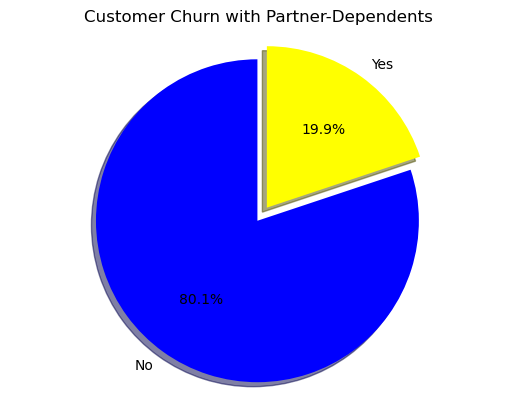

In [34]:
#creating the pie chart to show churn if Family Plan(FP) is Yes
#Filter data for Family Plan yes
#yes - churn customers, no - non-churn customers

Yes_FP = churn_counts[churn_counts['Partner-Dependents'] == 'Yes']
churn_no = Yes_FP['Churn']
customers = Yes_FP['count']
colors = ['blue', 'yellow']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_no, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Customer Churn with Partner-Dependents")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [79]:
#counting the percent churn by Family Plan
churn_percent=df_data_churn5.groupby('Family Plan')['Churn'].value_counts(normalize=True)
churn_percent

Family Plan  Churn
No           No       0.657622
             Yes      0.342378
Yes          No       0.801173
             Yes      0.198827
Name: proportion, dtype: float64

In [83]:
#creating the date frame for the above data
df_churn_percent= pd.DataFrame(churn_percent)
df_churn_percent


proportion
Family Plan Churn            
No          No       0.657622
            Yes      0.342378
Yes         No       0.801173
            Yes      0.198827

In [87]:
#resetting the index to add Family Plan and Churn to a column
churn_percent= churn_percent.reset_index()
churn_percent

,Family Plan,Churn,proportion
0,No,No,0.657622
1,No,Yes,0.342378
2,Yes,No,0.801173
3,Yes,Yes,0.198827


In [89]:
#convert decimalto percentge in the proportion column
churn_percent['proportion'] = churn_percent['proportion']*100
churn_percent


,Family Plan,Churn,proportion
0,No,No,65.762195
1,No,Yes,34.237805
2,Yes,No,80.117271
3,Yes,Yes,19.882729


In [91]:
#creating a data frame for the above data
df_churn_percent = pd.DataFrame(churn_percent)
df_churn_percent 

,Family Plan,Churn,proportion
0,No,No,65.762195
1,No,Yes,34.237805
2,Yes,No,80.117271
3,Yes,Yes,19.882729


In [93]:
#sorting  the Churn column with Yes and No
df_churn_percent = df_churn_percent.sort_values(["proportion"], ascending=True)
df_churn_percent

,Family Plan,Churn,proportion
3,Yes,Yes,19.882729
1,No,Yes,34.237805
0,No,No,65.762195
2,Yes,No,80.117271


In [97]:
#renaming the column proportion to Percentage
df_churn_percent=df_churn_percent.rename(columns={'proportion':'Percentage(%)'})
df_churn_percent

,Family Plan,Churn,Percentage(%)
3,Yes,Yes,19.882729
1,No,Yes,34.237805
0,No,No,65.762195
2,Yes,No,80.117271


In [99]:
# #  creating a new data frame for rows with Churn "Yes" 
churn_fp =df_churn_percent.loc[(df_churn_percent['Churn'] == "Yes")]
churn_fp

,Family Plan,Churn,Percentage(%)
3,Yes,Yes,19.882729
1,No,Yes,34.237805


In [103]:
#creating a bar chart to show churn rate by family plan

# Set x axis and tick locations
x_axis = np.arange(len(churn_fp))
tick_locations = [value for value in x_axis]

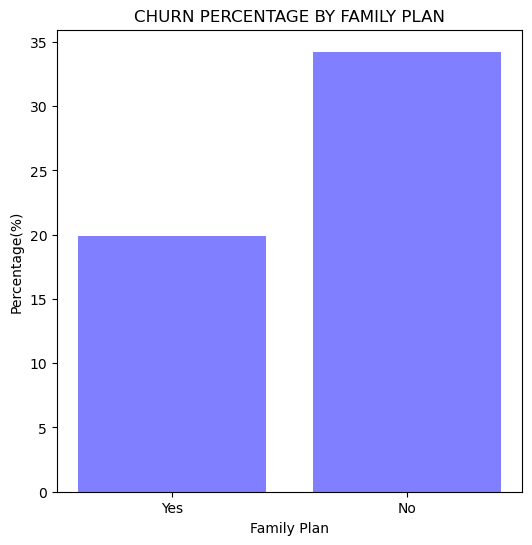

In [115]:
plt.figure(figsize=(6,6))
plt.bar(x_axis, churn_fp["Percentage(%)"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, churn_fp["Family Plan"], rotation="horizontal")
plt.xlabel("Family Plan")
plt.ylabel("Percentage(%)")
plt.title("CHURN PERCENTAGE BY FAMILY PLAN")
plt.show()

In [107]:
df_churn_percent

,Family Plan,Churn,Percentage(%)
3,Yes,Yes,19.882729
1,No,Yes,34.237805
0,No,No,65.762195
2,Yes,No,80.117271


In [121]:
#Checking the correlation - #used Co-pilot  for the coding to convert Contract Type and Churn to numeric values in order to find the correlation using pearson
# Label encode 'Contract Type'
label_encoder = LabelEncoder()
df_churn_percent['Family Plan'] = label_encoder.fit_transform(df_churn_percent['Family Plan'])

# Encode 'Churn' as numerical (Yes=1, No=0)
df_churn_percent['Churn'] = df_churn_percent['Churn'].map({'Yes': 1, 'No': 0})

# Check for constant data to check 'NAN"error
print(df_churn_percent['Family Plan'].unique())
print(df_churn_percent['Churn'].unique())

# Check for missing values to check 'NAN' error
print(df_churn_percent.isna().sum())

# Verify data
print(df_churn_percent.head())

# Calculate Pearson correlation
correlation, p_value = pearsonr(df_churn_percent['Family Plan'], df_churn_percent['Churn'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


[1 0]
[1 0]
Family Plan      0
Churn            0
Percentage(%)    0
dtype: int64
   Family Plan  Churn  Percentage(%)
3            1      1      19.882729
1            0      1      34.237805
0            0      0      65.762195
2            1      0      80.117271
Pearson correlation coefficient: 0.0
P-value: 1.0


In [123]:
#print the new data frame
df_churn_percent

,Family Plan,Churn,Percentage(%)
3,1,1,19.882729
1,0,1,34.237805
0,0,0,65.762195
2,1,0,80.117271
